In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
dt = pd.read_excel('/content/ConsumerOpinionSurvey.xlsx')

In [52]:
dt.head(5)

,S/N,ActionBy,Date Submitted,location,latitude,longitude,Report Title,Gender of the respondent?,What is the (inferred) age range of the respondent?,What is your marital status?,Religion of the respondent,What category of beverage do you consume?,"What would you suggest as the top 3 promotional gifts, that are less than N10,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","What would you suggest as the top 3 promotional gifts, between N10,000 - N50,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","What would you suggest as the top 3 promotional gifts, that are over N50,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","In a typical month, what are the top 5 things you spend your income on in order of importance?",What activity do you enjoy doing most with your close friends (indoor or outdoor)?,What do you benefit from these activities?
0,1,DAVID JULIUS Akanji,"Wed, Dec 19 2018 17:54:31","C M D ROAD, KOSOFE, LAGOS",6.628452,3.365249,2241 - Male,Male,25-34 years,Single,Christian,Larger Beer,"Key holder, face cap, sunglasses","Refrigerator, generator, Android phone","Mac book, car, well furnished apartment.","Food, cloths, data, call card, fuel",Watching football,Sharing ideas.
1,2,esther akindele,"Wed, Dec 19 2018 21:25:29","CHIEF ONITANA STREET, SURULERE, LAGOS",6.497371,3.363967,2311 - Male,Male,25-34 years,Married,Christian,Stout Beer,Wrist bands\nFan\nPower bank\n,Laptops\nSneaker\nDecoder,Laptops \nMicrowave\nSneakers,Transportation\nClothes\nTaxes\nSaving\nDrinki...,Clubbing\nPlaying chess,Motivation
2,3,esther akindele,"Thu, Dec 20 2018 19:11:51","CHIEF ONITANA STREET, SURULERE, LAGOS",6.497371,3.363967,2428 - Male,Male,18-24 years,Married,Christian,"Malt Drink"", ""Stout Beer"", ""Ready to Drink tea...",T.shirt\nFan\nDecoder,Generator\nBicycle\nSpeaker,Car\nMicrowave\nSmart phone,Payment of bills\nTax\nCharity\nDevelopment\nS...,Watching football\nSinging,Excitement
3,4,Ogundele Israel,"Sat, Dec 22 2018 07:27:50","KAYODE STREET, MUSHIN, LAGOS",6.532140,3.364181,2672 - Female,Female,25-34 years,Married,Christian,Larger Beer,"Foam bed, plastic table, set of plates","Tablet, electric oven, CD player","Generator, washing machine, LCD TV","Food, clothing, shelter, Charity, drinking",Going to Cinema,Ideas sharing
4,5,DAVID JULIUS,"Fri, Dec 21 2018 20:07:09","C M D ROAD, KOSOFE, LAGOS",6.626050,3.365277,2626 - Male,Male,18-24 years,Single,Christian,wine.,"Key holder, umbrella, face cap","Water dispenser, home theater, generator.","Television, car, deep freezer","Family, feeding, utility bills, transportation...",Drinking and hanging out.,Relaxation.


In [53]:
dt.isna().sum()

S/N                                                                                                                                                                                0
ActionBy                                                                                                                                                                           0
Date Submitted                                                                                                                                                                     0
location                                                                                                                                                                           0
latitude                                                                                                                                                                           0
longitude                                                                                      

In [54]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                           --------------  -----  
 0   S/N                                                                                                                                                                              520 non-null    int64  
 1   ActionBy                                                                                                                                                                         520 non-null    object 
 2   Date Submitted                                                    

In [55]:
dt['Gender of the respondent?'].value_counts()

Gender of the respondent?
Male      402
Female    118
Name: count, dtype: int64

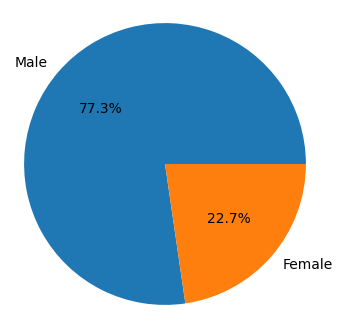

In [56]:
labels = dt['Gender of the respondent?'].value_counts().index
sizes = dt['Gender of the respondent?'].value_counts().values
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [57]:
dt['What is your marital status?'].value_counts()

What is your marital status?
Married    265
Single     249
Other        6
Name: count, dtype: int64

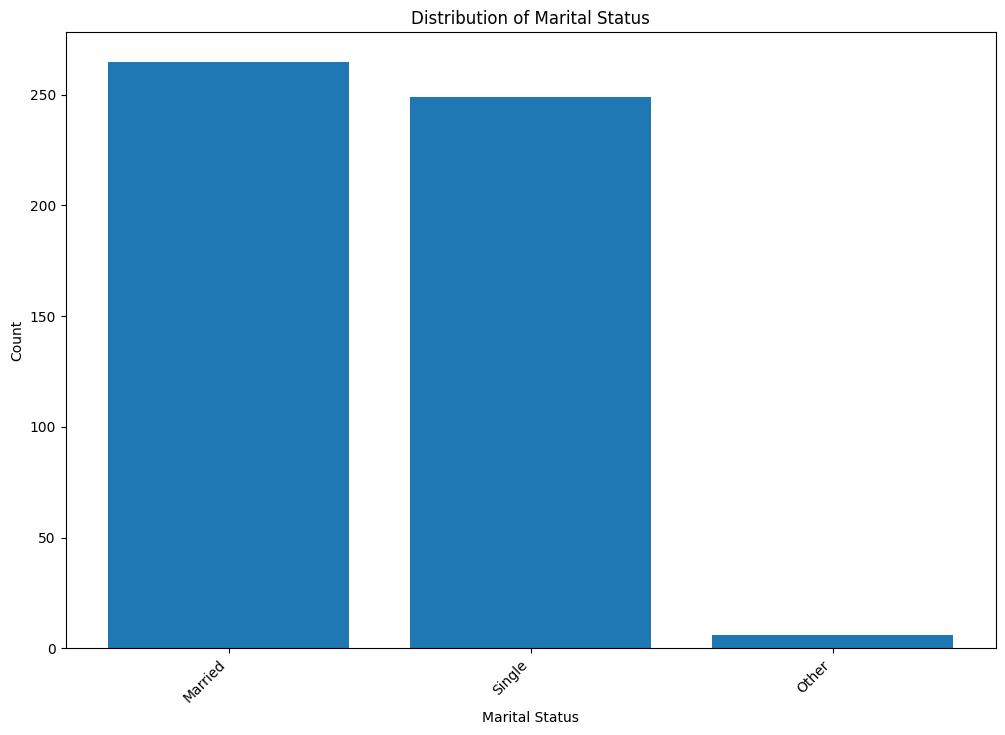

In [58]:
labels = dt['What is your marital status?'].value_counts().index
sizes = dt['What is your marital status?'].value_counts().values
plt.figure(figsize=(12, 8))
plt.bar(labels, sizes)
plt.xticks(rotation=45, ha= 'right')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

In [59]:
age = dt['What is the (inferred) age range of the respondent?']

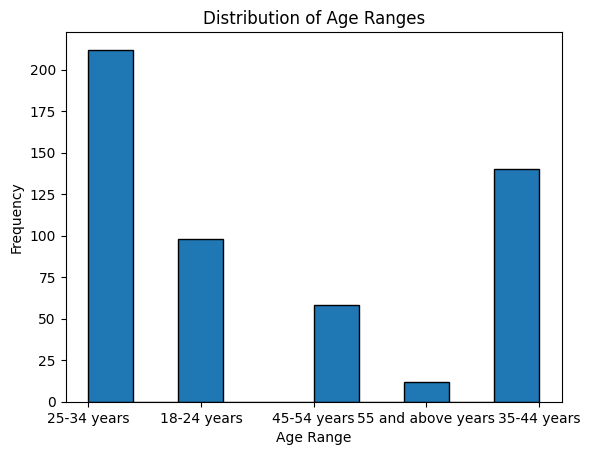

In [60]:
plt.hist(age, bins=10, edgecolor='black')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Distribution of Age Ranges')
plt.show()

In [61]:
dt['Religion of the respondent'].value_counts()

Religion of the respondent
Christian    345
Muslim       162
Other         13
Name: count, dtype: int64

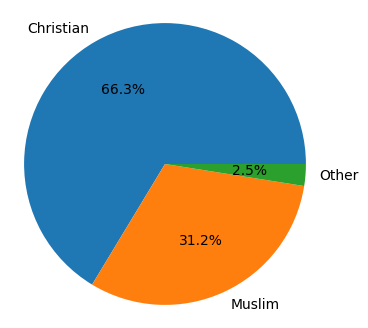

In [62]:
labels = dt['Religion of the respondent'].value_counts().index
sizes = dt['Religion of the respondent'].value_counts().values
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [63]:
!pip install folium

In [64]:
import folium

In [65]:
df = dt[['latitude', 'longitude', 'location']]
# Create a map centered around Lagos
lagos_coords = [6.5244, 3.3792]  # Coordinates of Lagos
m = folium.Map(location=lagos_coords, zoom_start=10)
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['location'],
    ).add_to(m)

In [66]:
from IPython.display import display

In [67]:
m

In [68]:
dt['What category of beverage do you consume?'].unique()

array(['Larger Beer', 'Stout Beer',
       'Malt Drink", "Stout Beer", "Ready to Drink tea", "Larger Beer", "Carbonated Soft Drink',
       'wine.',
       'Larger Beer", "Malt Drink", "Carbonated Soft Drink", "Stout Beer',
       'Stout Beer", "Larger Beer',
       'Ready to Drink tea", "Larger Beer", "Malt Drink", "Stout Beer',
       'Malt Drink", "Stout Beer", "Larger Beer", "Ready to Drink tea", "Carbonated Soft Drink',
       'Ready to Drink tea", "Larger Beer", "Carbonated Soft Drink", "Stout Beer',
       'Larger Beer", "Stout Beer',
       'Malt Drink", "Stout Beer", "Larger Beer", "Carbonated Soft Drink',
       'Gin with Coke', 'Ready to Drink tea', 'Malt Drink',
       'Ready to Drink tea", "Malt Drink", "Stout Beer", "Carbonated Soft Drink',
       'Larger Beer", "Carbonated Soft Drink", "Stout Beer',
       'Larger Beer", "Malt Drink", "Stout Beer',
       'Stout Beer", "Larger Beer", "red label, moet',
       'Carbonated Soft Drink', 'Larger Beer", "Carbonated Soft Drink

In [70]:
dt.head(2)

,S/N,ActionBy,Date Submitted,location,latitude,longitude,Report Title,Gender of the respondent?,What is the (inferred) age range of the respondent?,What is your marital status?,Religion of the respondent,What category of beverage do you consume?,"What would you suggest as the top 3 promotional gifts, that are less than N10,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","What would you suggest as the top 3 promotional gifts, between N10,000 - N50,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","What would you suggest as the top 3 promotional gifts, that are over N50,000, that your favorite alcoholic beverage drink would reward you with that you would appreciate?","In a typical month, what are the top 5 things you spend your income on in order of importance?",What activity do you enjoy doing most with your close friends (indoor or outdoor)?,What do you benefit from these activities?
0,1,DAVID JULIUS Akanji,"Wed, Dec 19 2018 17:54:31","C M D ROAD, KOSOFE, LAGOS",6.628452,3.365249,2241 - Male,Male,25-34 years,Single,Christian,Larger Beer,"Key holder, face cap, sunglasses","Refrigerator, generator, Android phone","Mac book, car, well furnished apartment.","Food, cloths, data, call card, fuel",Watching football,Sharing ideas.
1,2,esther akindele,"Wed, Dec 19 2018 21:25:29","CHIEF ONITANA STREET, SURULERE, LAGOS",6.497371,3.363967,2311 - Male,Male,25-34 years,Married,Christian,Stout Beer,Wrist bands\nFan\nPower bank\n,Laptops\nSneaker\nDecoder,Laptops \nMicrowave\nSneakers,Transportation\nClothes\nTaxes\nSaving\nDrinki...,Clubbing\nPlaying chess,Motivation
